<a href="https://colab.research.google.com/github/jgoncsilva/Classes_IronHack/blob/master/mega_revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# sample of age of students of data analytics bootcamp, from a population that is Pedro's June cohort. 
sample1 = np.array([21,27,30,26,32,20, 38])
sample2 = np.array([21,27,30,26,27,23, 38])

In [ ]:
np.mean(sample1)

27.714285714285715

In [ ]:
np.mean(sample2)

27.428571428571427

In [ ]:
# if I kept repeating this, I would get an array of values of the SAMPLE MEAN
# this is what represents the distribution of sample means

sample_means = [27.7,27.4]



In [ ]:
# generating an array of the ages of 500 people -> my population
# DISCLAIMER: this is academic, normally we dont have this array
population = np.random.randint(0,92,500)

In [ ]:
# take a sample from this array
#  I am removing 20 people from the population for my sample, WITH REPLACEMENT
sample1 = np.random.choice(population,20)



(array([ 5., 15.,  6.,  6., 12., 10.,  5., 13., 13., 15.]),
 array([ 1., 10., 19., 28., 37., 46., 55., 64., 73., 82., 91.]),
 <a list of 10 Patch objects>)

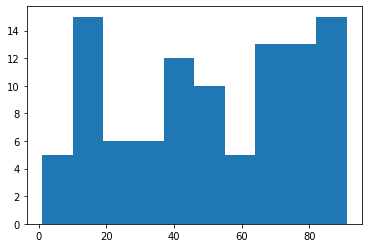

In [ ]:
# plotting the sampke taken as a histogram
plt.hist(sample1)

(array([51., 55., 46., 42., 53., 52., 46., 49., 53., 53.]),
 array([ 0. ,  9.1, 18.2, 27.3, 36.4, 45.5, 54.6, 63.7, 72.8, 81.9, 91. ]),
 <a list of 10 Patch objects>)

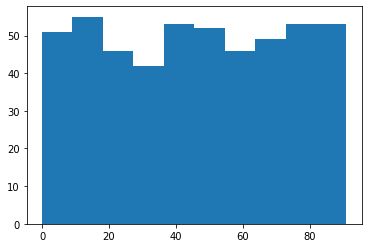

In [ ]:
# what type of distribution do i expect from the histogram of the population?
plt.hist(population)

In [ ]:
list_sample_means = []
list_sample_means2 = []

# I am going to perform my sampling 1000 times -> this is clearly unrealistics
for _ in range(0,1000):
  sample = np.random.choice(population,2)
  # create a list of means of my samples
  list_sample_means.append(np.mean(sample))

# what would happen if I perform the sample number of samples (1000) but INCREASE the size of each sample

for _ in range(0,1000):
  # increasing the size of the sample to 100
  sample = np.random.choice(population,100)
  # create a list of means of my samples
  list_sample_means2.append(np.mean(sample))





In [ ]:
list_sample_means

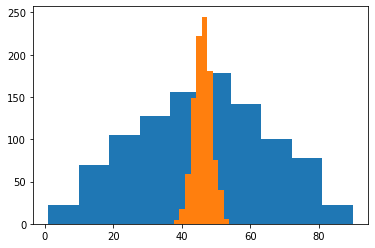

In [ ]:
plt.hist(list_sample_means)
plt.hist(list_sample_means2)
plt.show()

In [ ]:
# the sample mean distribution follows a normal distribution X ~ N(mean_pop, std/sqrt(n))

# where n is the size of each sample

In [ ]:
# let's compare the mean of the sample means with the real mean of the population (which is usually unknown)
np.mean(list_sample_means)

45.69006666666667

In [ ]:
np.mean(population)

45.982

In [ ]:
# CHEATING WATCH OUT
# here we are assuming we know the population standard deviation
pop_std = np.std(population)
pop_std

26.635571628932613

In [ ]:
# building confidence intervals

# let's now build a confidence interval for the average age of my population, based on a sample only

sample = np.random.choice(population, 50)

In [ ]:
# there are methods plug n play that allow you to calculate immediately everything
# the Pedro way

s_mean = np.mean(sample)

# even though in this case i'm not gonna use it (because in this example I assume I know the pop_std)
s_std = np.std(sample)

# build my distribution of the sample means

from scipy.stats import norm

#create an instance of my normal distribution for the sample mean
# X ~ N( sample_mean, sigma/sqrt(n))

norm_dist = norm(s_mean, pop_std/np.sqrt(len(sample)))

In [ ]:
# I will call the interval method inside my distribution, stating the confidence level that I want -> 90% confidence level
lower, upper = norm_dist.interval(0.9)

# the 0.9 you wrote inside the interval method is stated in the documentation as alpha, but it DOES NOT MEAN the significance level. it means the confidence level :( 
    
print(upper-lower)

12.391796476978563


In [ ]:
# the process in code terms for when you dont know the standard deviation of the population is ALMOST EXACTLY THE SAME

In [ ]:
# correction we must apply for the standard deviation of the sample

n = len(sample)
s_std = np.sqrt(np.std(sample)**2*n/(n-1))


In [ ]:
# how about if I dont know the standard deviation of the population? this is very common

s_mean = np.mean(sample)
#s_std = np.std(sample)



# now we build the distribution using the correct function -> t

from scipy.stats import t

# loc = mean (location)
# scale = standard deviation to be used -> sample_std/sqrt(n)
# df = degrees of freedom

# building the distribution of the sample means, centered around the observed sample mean!!!!!! but this time, from a t student

t_dist = t(df = len(sample)-1, loc = s_mean, scale = s_std/np.sqrt(len(sample)))

In [ ]:
# I now get my confidence interval, using the same methodology/reasoning as before (for the normal distribution), but all that changed was the model that we now used (t student's )

lower, upper = t_dist.interval(0.9)
print(upper-lower)

11.860883671734882


In [ ]:
# talk about 30 in central limit theorem

(38.624101761510715, 51.01589823848928)

In [ ]:
# example 7.4 
trucks = [15.5, 21.0, 18.5, 19.3, 19.7, 16.9, 20.2, 14.5, 16.5, 19.2, 18.7,18.2, 18.0, 17.5, 18.5 , 20.5, 18.6, 19.1, 19.8, 18.0, 19.8, 18.2, 20.3, 21.8]

sample_mean = np.mean(trucks)

# calculate what we call the unbiased sample standard deviation 

# std = sqrt(mean difference^2/N)

# the parameter ddof = 1 means that the standard deviation calculated is for the sample and is therefore corrected with the n-1 factor

sample_std = np.std(trucks, ddof = 1)



In [ ]:
# build the distribution of the sample mean, centered on the observed mean

from scipy.stats import t

t_dist = t(df = len(trucks) - 1, loc = sample_mean, scale = sample_std/np.sqrt(len(trucks)))



In [ ]:
# build a confidence interbal of 90% for the average consumption of the trucks  

lower, upper = t_dist.interval(0.9)

In [ ]:
# this is the width of my confidence interval
print(upper-lower)

1.1861458172275405


In [ ]:
upper

19.272239575280434

In [ ]:
lower

18.086093758052893

In [ ]:
# slightly new topic -> still building confidence intervals but when we have two different samples

# dependent samples

# independent samples



In [ ]:
# the code of independent samples and build a confidence interval

import pandas as pd

data = pd.read_excel("Train_rev1.xlsx")

In [ ]:
data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [ ]:
data['Category'].unique()

array(['Engineering Jobs', 'HR & Recruitment Jobs',
       'Accounting & Finance Jobs', 'Healthcare & Nursing Jobs',
       'Other/General Jobs', 'Hospitality & Catering Jobs', 'IT Jobs',
       'Customer Services Jobs', 'Travel Jobs', 'Sales Jobs',
       'Manufacturing Jobs', 'Teaching Jobs', 'Creative & Design Jobs',
       'Trade & Construction Jobs', 'Property Jobs', 'Admin Jobs',
       'Legal Jobs', 'Retail Jobs', 'Consultancy Jobs',
       'Energy, Oil & Gas Jobs', 'Logistics & Warehouse Jobs',
       'PR, Advertising & Marketing Jobs', 'Charity & Voluntary Jobs',
       'Scientific & QA Jobs', 'Maintenance Jobs',
       'Domestic help & Cleaning Jobs', 'Social work Jobs',
       'Graduate Jobs'], dtype=object)

In [ ]:
cat_1 = 'Charity & Voluntary Jobs'

cat_2 = 'IT Jobs'

# here im getting all the jobs of category 1
data_1 = data[data['Category'] == cat_1]
# here im getting all the jobs of category 2
data_2 = data[data['Category'] == cat_2]

# assuming the dataset is the population -> dangerous assumption?


In [ ]:
sample_1 = np.random.choice(pd.to_numeric(data_1['SalaryNormalized']), 50)

sample_2 = np.random.choice(pd.to_numeric(data_2['SalaryNormalized']), 50)

In [ ]:
std_cat1

18720.246991626176

In [ ]:
# build my distribution of the difference of the sample means -> here we are assuming we know the standard deviations of the population

# using data_1 and NOT the sample -> assuming the data is the population
# these are the standard deviation of the population
std_cat1 = np.std(data_1['SalaryNormalized'])
std_cat2 = np.std(data_2['SalaryNormalized'])

mean = np.mean(sample_1) - np.mean(sample_2)

sigma_star = np.sqrt(np.square(std_cat1)/len(sample1) + np.square(std_cat2)/len(sample2))


# after this the process is exactly the same

from scipy.stats import norm

norm_dist = norm(mean, sigma_star)




In [ ]:
# confidence interval 
lower, upper = norm_dist.interval(0.95)

print(lower)
print(upper)

-30539.478693823345
-1771.32130617666


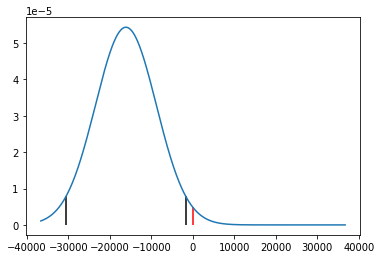

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
x = np.linspace(sample_mean - 5*sigma_star,sample_mean + 5*sigma_star,1000)
y = norm_dist.pdf(x)
ax.plot(x,y)
plt.vlines(lower,0,norm_dist.pdf(lower))
plt.vlines(upper,0,norm_dist.pdf(upper))
plt.vlines(sample_mean,0,norm_dist.pdf(sample_mean), color = 'red')
plt.hlines(0, 20,70, colors = 'r')
plt.show()

In [ ]:
# solving example 9.1 of hypthesis testing

# got this from my assumption
mean = 80

standard_dev = 8
n = 25

# build my distribution

from scipy.stats import norm

normal_dist = norm(mean, standard_dev/np.sqrt(n))

In [ ]:
# I am creating a confidence interval with 90% in the center, and therefore 5% to each side

normal_dist.interval(0.9)

(77.36823419687764, 82.63176580312236)

In [ ]:
# My decision boundary is that if my observed mean > 82.6 
# then I reject H0 -> assume that my change made an effect (to increase prod)

